In [31]:
import re
import pandas as pd
import numpy as np
import math
import collections # 词频统计库
from keras.models import Sequential 
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence 
from   .layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
#读取数据
with open("C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\wordLib3.txt","r",encoding='utf-8') as f:
    file = f.read()
word_all = file.split()
with open("C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\review3.txt","r",encoding='utf-8') as F:
    review = F.readlines()
f.close()
F.close()

data = pd.read_csv('C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\IMDB Dataset.csv')
Y = data["sentiment"]
Y = np.array(Y)
Y = Y.tolist()
for i in range(len(Y)):
    if Y[i] == 'positive':
        Y[i] = 1
    else:
        Y[i] = 0

In [49]:
 #计算精度、查准率P、查全率R、
def cal_acc(pred,y_test):
    acc = 0;
    for i in range(len(pred)):
        acc += abs(pred[i]-y_test[i])
    acc /= len(pred)
    acc = 1-acc
    return acc

def cal_TP_FN_FP_TN(pred,y_test):
    TP = 0 
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(pred)):
        if(pred[i] == 1 and y_test[i] == 1):
            TP += 1
        if(pred[i] == 1 and y_test[i] == 0):
            FP += 1
        if(pred[i] == 0 and y_test[i] == 0):
            TN += 1
        if(pred[i] == 0 and y_test[i] == 1):
            FN += 1
    return TP,FN,FP,TN

def cal_P(TP,FP):
    P = TP/(TP+FP)
    return P

def cal_R(TP,FN):
    R = TP / (TP+FN)
    return R


def IDF(corpus, word_dict):
    n3 = len(corpus)
    idf = []
    for word in word_dict.keys():
        #print(word)
        n4 = 0
        for j in range(len(corpus)):
            if word in corpus[j].split():
                n4 += 1
        idf.append(math.log(((n3+1)/(n4+1)),10))
    return idf


#计算TF
def TF(corpus,word_all):
    weight_tf = [[] for i in corpus]
    for word in word_all:
        for i in range(len(corpus)):
            temp_list = corpus[i].split()
            n1 = temp_list.count(word)
            n2 = len(temp_list)
            tf = n1/n2
            weight_tf[i].append(tf)
    return weight_tf

#计算TF-IDF并返回
def TF_IDF(corpus, word_dict, idf):
    weight = [[] for i in corpus]
    for word in word_dict.keys():
        for i in range(len(corpus)):
            temp_list = corpus[i].split()
            n1 = temp_list.count(word)
            n2 = len(temp_list)
            tf = n1/n2
            index = word_dict[word]-1
            weight[i].append(tf*idf[index])
    #l2_weight = L2(weight)
    return weight

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review)
word_index = tokenizer.word_index

In [16]:
idf = IDF(review,word_index)

movie
film
like
good
time
story
great
bad
people
dont
movies
films
way
characters
think
watch
seen
character
love
acting
little
plot
best
know
life
better
scene
end
man
scenes
real
im
watching
thing
doesnt
didnt
actors
years
actually
funny
makes
find
look
going
work
lot
new
old
cant
director
want
thats
things
pretty
cast
got
young
fact
world
big
horror
thought
ive
long
saw
isnt
gets
right
music
original
come
series
times
comedy
role
interesting
guy
action
point
bit
theres
far
hes
minutes
script
feel
probably
family
kind
performance
tv
away
worst
fun
found
sure
played
girl
making
believe
woman
trying
shows
especially
having
course
comes
hard
goes
day
different
worth
main
looking
dvd
ending
place
looks
wasnt
book
watched
maybe
sense
reason
screen
set
effects
true
plays
play
job
money
actor
said
takes
10
american
instead
beautiful
special
seeing
later
left
audience
war
version
excellent
john
idea
night
shot
black
simply
high
fan
youre
completely
house
nice
read
poor
wife
death
kids
friend

In [20]:
#把idf写如文件
f=open("C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\idf3.txt","w",encoding='utf-8')
for num in idf:
    f.write(str(num) + ' ')
f.write('\n')
f.close()

In [50]:
tfidf = TF_IDF(review,word_index,idf)

In [56]:
#把tfidf写如文件
f=open("C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\tfidf3.txt","w",encoding='utf-8')
for vec in tfidf:
    for num in vec:
        f.write(str(num) + ' ')
    f.write('\n')
f.close()

In [55]:
print(type(word_index))
print(len(word_index))
w = 'innocent'
print(word_index[w])
print(len(tfidf))
print((tfidf[100]))

<class 'dict'>
2659
1038
50000
[0.0, 0.014564737587364679, 0.0, 0.0, 0.017619354342560165, 0.009817330889343525, 0.0, 0.0, 0.0, 0.011035640352472764, 0.0, 0.02544902359459738, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02608843218522047, 0.0, 0.0, 0.0, 0.013525756735704853, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015042679738204461, 0.0, 0.01542422645374059, 0.0, 0.0, 0.0, 0.0, 0.01659627899220301, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017745743294478356, 0.01913416251669865, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019566240193041432, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02030755140412891, 0.0, 0.0, 0.0, 0.0, 0.020658366311314184, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [57]:
tfidf_train = tfidf[0:30000]
tfidf_valid = tfidf[30000:40000]
tfidf_test = tfidf[40000:]
y_train = Y[0:30000]
y_valid = Y[30000:40000]
y_test = Y[40000:]

In [91]:
print(len(tfidf))
print(len(tfidf[0]))
print(type(tfidf))
print(type(Y))
print(len(Y))
print(Y[0])

50000
2659
<class 'list'>
<class 'list'>
50000
1


In [83]:
model = Sequential()
#model.add(Embedding(2659, 64, input_length = 20000))
model.add(Conv1D(filters = 64, kernel_size = 3,input_shape=(2659, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
#model.add(Conv1D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu'))
#model.add(MaxPooling1D(pool_size = 2))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
#model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 2659, 64)          256       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 1329, 64)         0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 1329, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 85056)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                5443648   
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                      

In [84]:
# 训练
history = model.fit(tfidf_train, y_train, epochs=8, batch_size=128,
                    verbose=1, validation_data=[tfidf_valid, y_valid])
model_file = 'C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\tfidf_model.h5'
model.save(model_file)

Epoch 1/8
235/235 [==============================] - 125s 532ms/step - loss: 0.5225 - accuracy: 0.7608 - val_loss: 0.3915 - val_accuracy: 0.8270
Epoch 2/8
235/235 [==============================] - 60s 257ms/step - loss: 0.3605 - accuracy: 0.8484 - val_loss: 0.3555 - val_accuracy: 0.8445
Epoch 3/8
235/235 [==============================] - 59s 251ms/step - loss: 0.3316 - accuracy: 0.8604 - val_loss: 0.3453 - val_accuracy: 0.8467
Epoch 4/8
235/235 [==============================] - 59s 251ms/step - loss: 0.3213 - accuracy: 0.8655 - val_loss: 0.3556 - val_accuracy: 0.8428
Epoch 5/8
235/235 [==============================] - 59s 252ms/step - loss: 0.3076 - accuracy: 0.8696 - val_loss: 0.3394 - val_accuracy: 0.8529
Epoch 6/8
235/235 [==============================] - 60s 257ms/step - loss: 0.2964 - accuracy: 0.8759 - val_loss: 0.3364 - val_accuracy: 0.8544
Epoch 7/8
235/235 [==============================] - 59s 251ms/step - loss: 0.2833 - accuracy: 0.8801 - val_loss: 0.3380 - val_accuracy

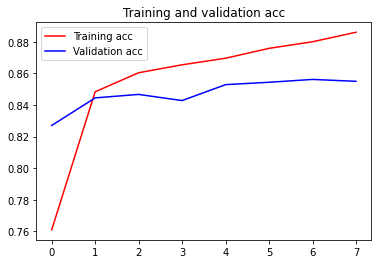

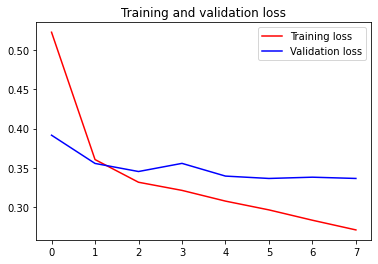

In [85]:
plt.figure()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs,acc,'r',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.savefig('C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\tfidf_acc8.png')
plt.show()

plt.plot(epochs,loss,'r',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\tfidf_loss8.png')
plt.show()

In [86]:
tfidf_pred = model.predict(tfidf_test)
for i in range(len(tfidf_pred)):
    if(tfidf_pred[i] > 0.5):
        tfidf_pred[i] = 1
    else:
        tfidf_pred[i] = 0

acc = cal_acc(tfidf_pred,y_test)
TP, FN, FP, TN = cal_TP_FN_FP_TN(tfidf_pred,y_test)
P = cal_P(TP,FP)
R = cal_R(TP,FN)
print("acc is "+str(acc[0]))
print("P is "+str(P))
print("R is "+str(R))

acc is 0.8543
P is 0.8580072609923356
R is 0.8496105452366687
